In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
# %matplotlib inline

In [2]:
X = pd.read_excel('q3-data/data_h.xlsx', header=None).to_numpy()

Cluster Distance computation: The class below enables the formation of distance/similarity matrix between the sample elements. Some methods of the class are used to compute distance based on certain criterion because after some iteration in Hierarchial clustering, we will have to compute distances between samples and clusters and between two clusters and so on.

Implementing the clustering method: We now implement the clustering method and we keep on printing the clusters formed after each iteration. This will be used to verify the clustering done from our implementation of agglomerative clustering with single linkage with other modules available

Final Comments on our implementation: We used the single linkage in our case, We can modify the existing code to implement complete linkage and ward's methods as well

TOP DOWN APPROACH

In [4]:
def TopDown(current, counter):
    ans = []
    kmeans = KMeans(n_clusters=2)
    # choose the biggest or worst cluster and just fit kmeans on that ONE
    for c in current:
        kmeans.fit(c)
        left, right = c[kmeans.labels_ == 0], c[kmeans.labels_ == 1]
        ans.append(left)
        ans.append(right)
        
    for idx, data in enumerate(ans):
        axs[counter].scatter(data[:, 0], data[:, 1], color=colors[idx + 1], label=idx)
#         axs[idx].scatter(X[:, 0], X[:, 1], color=colors[0], label='X')
        axs[counter].set_title(f'{idx}', loc='left')
        axs[counter].set_xlabel('x')
        axs[counter].set_ylabel('y')
        axs[counter].legend(loc='lower right')
    
    return ans

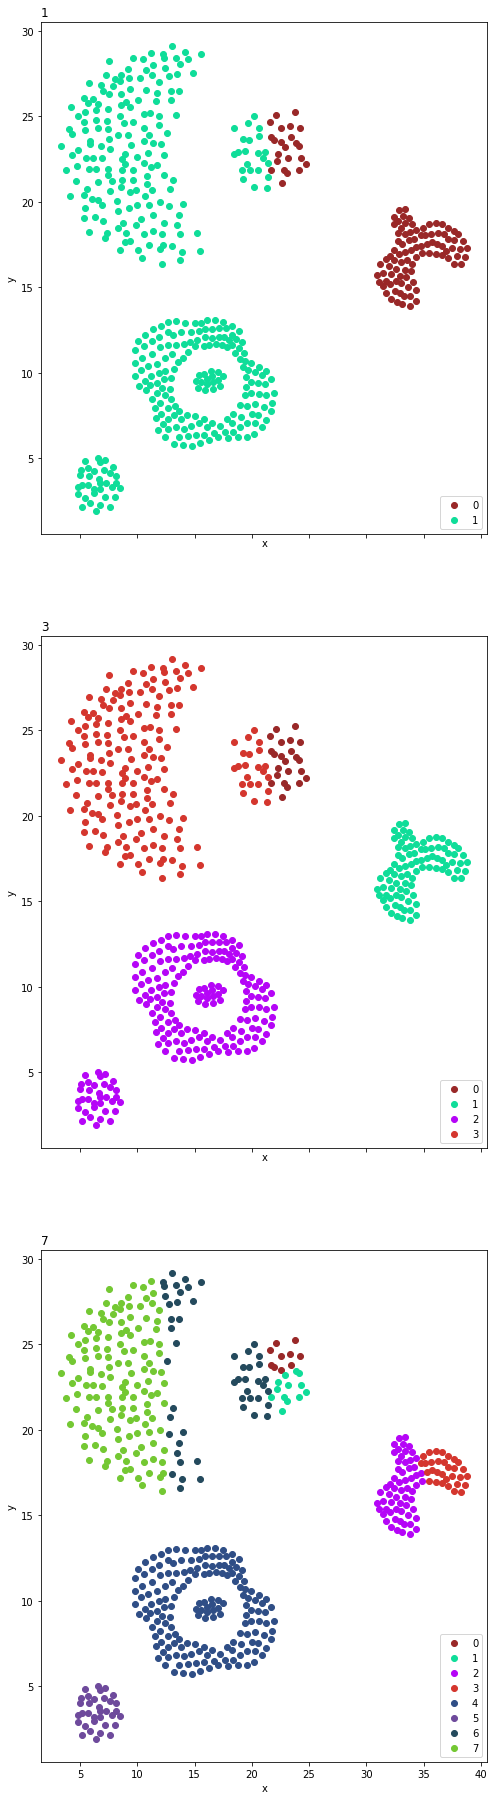

In [5]:
fig, axs = plt.subplots(ncols=1, nrows=3, figsize=(8, 32), sharex=True, sharey=True)
rgen = np.random.RandomState(42)
colors = rgen.rand(9,3)

current = []
current.append(X)


counter = 0
while True:
    current = TopDown(current, counter)
    counter += 1
    if len(current) >= 8:
        break


# for idx, data in enumerate(current):
#     axs[idx].scatter(data[:, 0], data[:, 1], color=colors[idx + 1], label=idx)
#     axs[idx].scatter(X[:, 0], X[:, 1], color=colors[0], label='X')
#     axs[idx].set_title(f'{idx}', loc='left')
#     axs[idx].set_xlabel('x')
#     axs[idx].set_ylabel('y')
#     axs[idx].legend(loc='lower right')

In [6]:
def complete_link(X1, X2):
    retval = 0
    for x1 in X1:
        for x2 in X2:
            v = np.linalg.norm(x1 - x2)
            retval = v if v > retval else retval
    return retval

def average_link(X1, X2):
    retval = []
    for x1 in X1:
        for x2 in X2:
            retval.append(np.linalg.norm(x1 - x2))
    return np.mean(retval)

def single_link(X1, X2):
    retval = 1000 * 1000 * 1000
    for x1 in X1:
        for x2 in X2:
            v = np.linalg.norm(x1 - x2)
            retval = v if v < retval else retval
    return retval

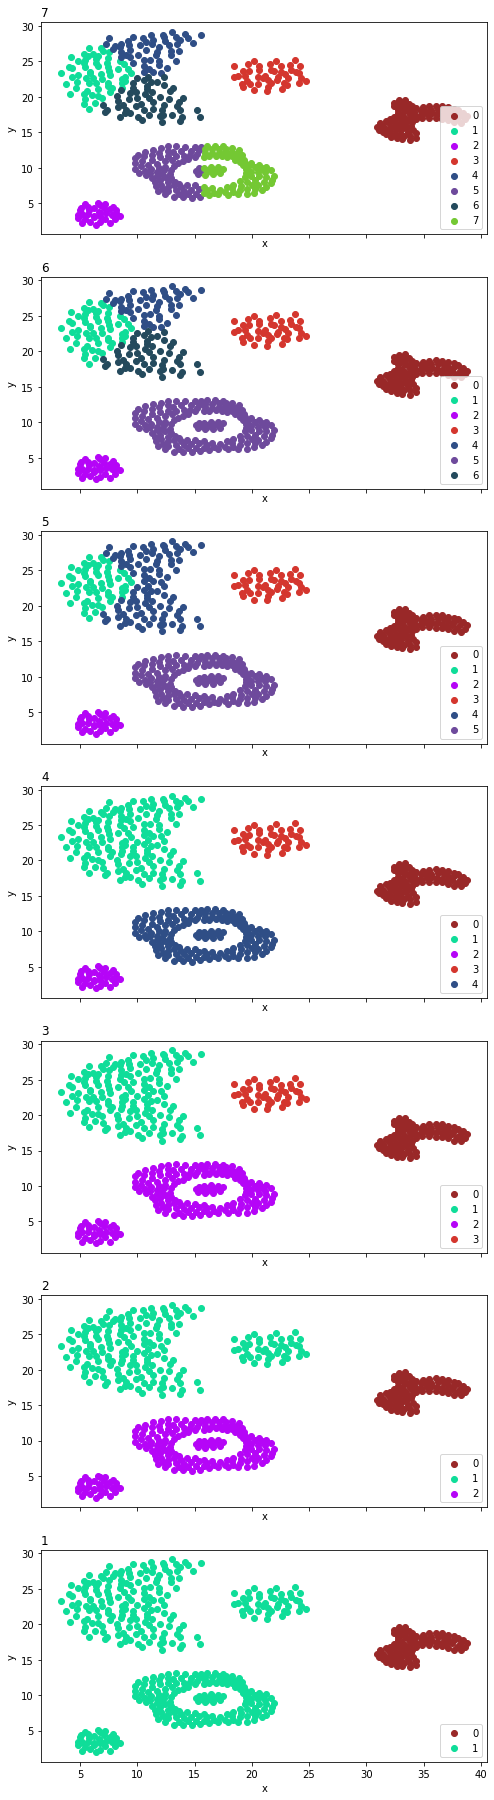

In [53]:
figure, ax = plt.subplots(ncols=1, nrows=7, figsize=(8, 32), sharex=True, sharey=True)
X = pd.read_excel('q3-data/data_h.xlsx', header=None).to_numpy()
kmeans = KMeans(n_clusters=8)
kmeans.fit(X)

# X = X.tolist()
# print(type(X))
clusters = []
for i in range(8):
    clusters.append(X[kmeans.labels_ == i].tolist())

# DownTop(clusters)
counter = 0

for idx, data in enumerate(clusters):
    ax[counter].scatter(np.array(data)[:, 0], np.array(data)[:, 1], color=colors[idx + 1], label=idx)
#         axs[idx].scatter(X[:, 0], X[:, 1], color=colors[0], label='X')
    ax[counter].set_title(f'{idx}', loc='left')
    ax[counter].set_xlabel('x')
    ax[counter].set_ylabel('y')
    ax[counter].legend(loc='lower right')
        

counter = 1
while len(clusters) > 2:
    distances = np.zeros((len(clusters), len(clusters)))

    for i, c1 in enumerate(clusters):
        for j, c2 in enumerate(clusters):
            # calculate the distance between two clusters
            if i == j:
                distances[i, j] = np.inf
            else:
                distances[i, j] = complete_link(np.array(c1), np.array(c2))
        
    i, j = np.unravel_index(np.argmin(distances), distances.shape)
    clusters[i].extend(clusters[j])
    clusters = clusters[:j] + clusters[j + 1:]
    
    for idx, data in enumerate(clusters):
        ax[counter].scatter(np.array(data)[:, 0], np.array(data)[:, 1], color=colors[idx + 1], label=idx)
#         axs[idx].scatter(X[:, 0], X[:, 1], color=colors[0], label='X')
        ax[counter].set_title(f'{idx}', loc='left')
        ax[counter].set_xlabel('x')
        ax[counter].set_ylabel('y')
        ax[counter].legend(loc='lower right')

    counter += 1
    
#     return clusters


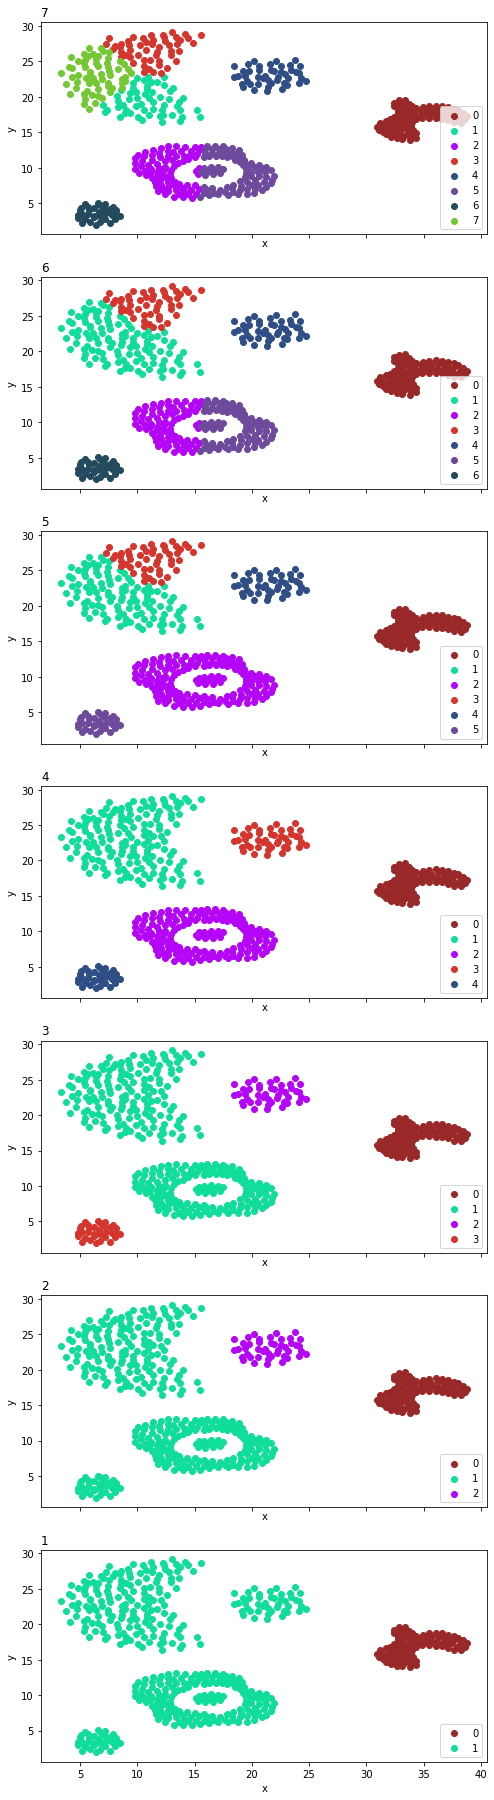

In [54]:
figure, ax = plt.subplots(ncols=1, nrows=7, figsize=(8, 32), sharex=True, sharey=True)
X = pd.read_excel('q3-data/data_h.xlsx', header=None).to_numpy()
kmeans = KMeans(n_clusters=8)
kmeans.fit(X)

# X = X.tolist()
# print(type(X))
clusters = []
for i in range(8):
    clusters.append(X[kmeans.labels_ == i].tolist())

# DownTop(clusters)
counter = 0

for idx, data in enumerate(clusters):
    ax[counter].scatter(np.array(data)[:, 0], np.array(data)[:, 1], color=colors[idx + 1], label=idx)
#         axs[idx].scatter(X[:, 0], X[:, 1], color=colors[0], label='X')
    ax[counter].set_title(f'{idx}', loc='left')
    ax[counter].set_xlabel('x')
    ax[counter].set_ylabel('y')
    ax[counter].legend(loc='lower right')
        

counter = 1
while len(clusters) > 2:
    distances = np.zeros((len(clusters), len(clusters)))

    for i, c1 in enumerate(clusters):
        for j, c2 in enumerate(clusters):
            # calculate the distance between two clusters
            if i == j:
                distances[i, j] = np.inf
            else:
                distances[i, j] = single_link(np.array(c1), np.array(c2))
        
    i, j = np.unravel_index(np.argmin(distances), distances.shape)
    clusters[i].extend(clusters[j])
    clusters = clusters[:j] + clusters[j + 1:]
    
    for idx, data in enumerate(clusters):
        ax[counter].scatter(np.array(data)[:, 0], np.array(data)[:, 1], color=colors[idx + 1], label=idx)
#         axs[idx].scatter(X[:, 0], X[:, 1], color=colors[0], label='X')
        ax[counter].set_title(f'{idx}', loc='left')
        ax[counter].set_xlabel('x')
        ax[counter].set_ylabel('y')
        ax[counter].legend(loc='lower right')

    counter += 1
    
#     return clusters


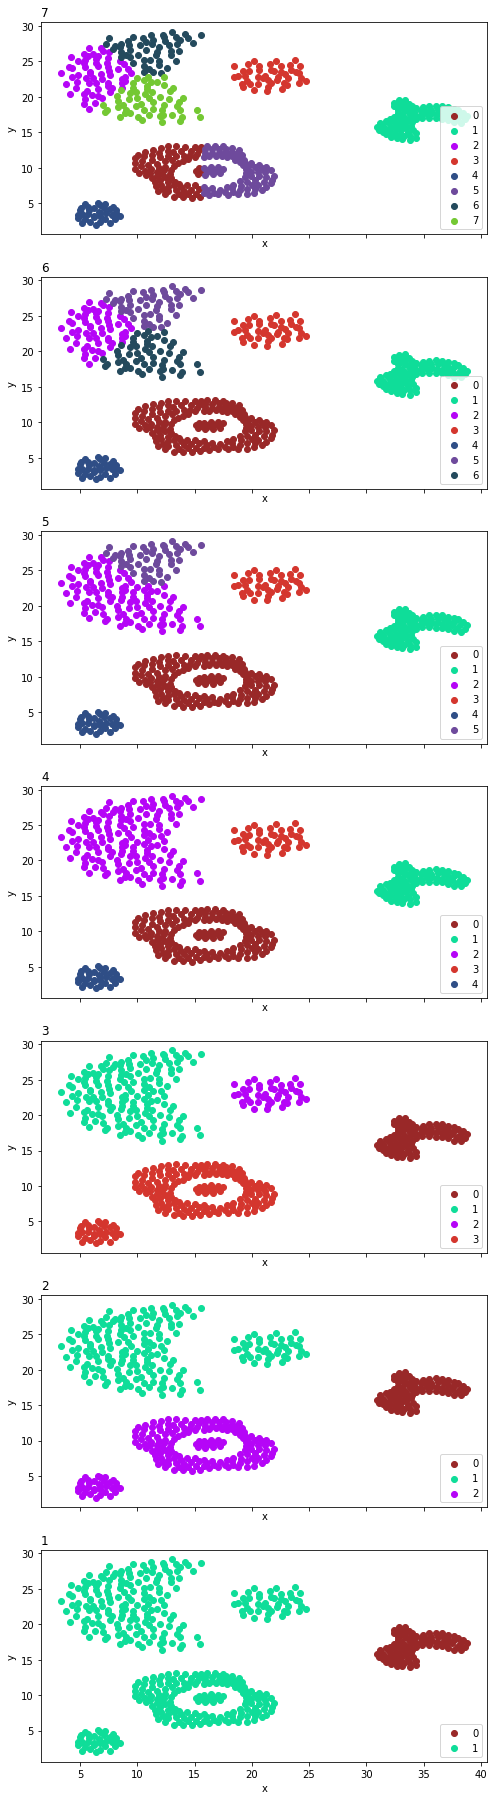

In [55]:
figure, ax = plt.subplots(ncols=1, nrows=7, figsize=(8, 32), sharex=True, sharey=True)
X = pd.read_excel('q3-data/data_h.xlsx', header=None).to_numpy()
kmeans = KMeans(n_clusters=8)
kmeans.fit(X)

# X = X.tolist()
# print(type(X))
clusters = []
for i in range(8):
    clusters.append(X[kmeans.labels_ == i].tolist())

# DownTop(clusters)
counter = 0

for idx, data in enumerate(clusters):
    ax[counter].scatter(np.array(data)[:, 0], np.array(data)[:, 1], color=colors[idx + 1], label=idx)
#         axs[idx].scatter(X[:, 0], X[:, 1], color=colors[0], label='X')
    ax[counter].set_title(f'{idx}', loc='left')
    ax[counter].set_xlabel('x')
    ax[counter].set_ylabel('y')
    ax[counter].legend(loc='lower right')
        

counter = 1
while len(clusters) > 2:
    distances = np.zeros((len(clusters), len(clusters)))

    for i, c1 in enumerate(clusters):
        for j, c2 in enumerate(clusters):
            # calculate the distance between two clusters
            if i == j:
                distances[i, j] = np.inf
            else:
                distances[i, j] = average_link(np.array(c1), np.array(c2))
        
    i, j = np.unravel_index(np.argmin(distances), distances.shape)
    clusters[i].extend(clusters[j])
    clusters = clusters[:j] + clusters[j + 1:]
    
    for idx, data in enumerate(clusters):
        ax[counter].scatter(np.array(data)[:, 0], np.array(data)[:, 1], color=colors[idx + 1], label=idx)
#         axs[idx].scatter(X[:, 0], X[:, 1], color=colors[0], label='X')
        ax[counter].set_title(f'{idx}', loc='left')
        ax[counter].set_xlabel('x')
        ax[counter].set_ylabel('y')
        ax[counter].legend(loc='lower right')

    counter += 1
    
#     return clusters
